<a href="https://colab.research.google.com/github/Sobhani79/DS1/blob/main/Final_Project_DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data= pd.read_csv('/content/bigmart.csv')

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.shape

(8523, 12)

In [ ]:
data = data.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1) #axis=1 مهمه باید بفهمه ستون رو قراره حذف کنه

In [ ]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.shape

(8523, 10)

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [ ]:
data.isnull().sum()

,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0
Item_Outlet_Sales,0


دو تا ستون تعداد زیادی سلول خالی دارن

تعداد خیلی زیاده مطنقی نیست حذف کنیم

میانگین یا مد رو براشون می ذاریم



In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].median(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

روش های پیشرفته تر جایگزینی هستش

KNN Imputer

Regression Imputation

MICE

کد چت جی پی تی هرکدوم رو  پایین میذارم ولی اجرا نمی کنم فعلا



* KNN Imputer is useful for capturing local patterns but can be computationally intensive for large datasets.

* MICE is powerful for multivariate data with complex relationships but can be slow.

* Regression Imputation is straightforward and works well if you have strong predictors.
Choose the method that best suits your dataset's characteristics and your project needs.

You can use regression models to predict the missing values based on other features.


For example, you can train a regression model with other columns as predictors and the column with missing values as the target.

In [ ]:
#Regression Imputation
'''
from sklearn.linear_model import LinearRegression

# Separate rows with and without missing values
known_data = df[df['Item_Weight'].notnull()]
missing_data = df[df['Item_Weight'].isnull()]

# Train a regression model to predict 'Item_Weight'
model = LinearRegression()
predictors = ['Other_Feature_1', 'Other_Feature_2']  # Replace with actual feature names
model.fit(known_data[predictors], known_data['Item_Weight'])

# Predict missing 'Item_Weight'
df.loc[df['Item_Weight'].isnull(), 'Item_Weight'] = model.predict(missing_data[predictors])
'''

KNN imputation uses the k-nearest neighbors to estimate the missing values based on the similarity between observations.

It can work well when there are complex interactions between variables.

In [ ]:
#KNN Imputer
'''
from sklearn.impute import KNNImputer

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Impute missing values in numerical columns
df[['Item_Weight']] = knn_imputer.fit_transform(df[['Item_Weight']])

# For categorical data, you would need to encode it to numerical form before using KNN
# For 'Outlet_Size', you might want to label encode before using KNN
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Outlet_Size' before KNN imputation
le = LabelEncoder()
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'].astype(str))

# Impute missing values
df[['Outlet_Size']] = knn_imputer.fit_transform(df[['Outlet_Size']])

# Decode the 'Outlet_Size' back to original labels
df['Outlet_Size'] = le.inverse_transform(df['Outlet_Size'].astype(int))
'''

MICE performs multiple imputations by iterating over each variable with missing values and modeling it based on other variables in the dataset.

This method is useful when the dataset has multiple features that can predict the missing values

In [ ]:
#Multivariate Imputation by Chained Equations (MICE)
'''
from sklearn.experimental import enable_iterative_imputer  # Required to enable the experimental feature
from sklearn.impute import IterativeImputer

# Initialize the Iterative Imputer
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Impute missing values for numerical data
df[['Item_Weight']] = mice_imputer.fit_transform(df[['Item_Weight']])

# For categorical data, convert it to numerical form before MICE
# Using 'Outlet_Size'
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'].astype(str))
df[['Outlet_Size']] = mice_imputer.fit_transform(df[['Outlet_Size']])
df['Outlet_Size'] = le.inverse_transform(df['Outlet_Size'].astype(int))
'''

In [ ]:
data.isnull().sum()

,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0
Item_Outlet_Sales,0


In [ ]:
# data.head() #ستون چهارم رو پر کرد مثلا

چک کردن داپلیکیت

اینجا نداره خوشبختانه

In [ ]:
# Find and count duplicate rows
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
print(f"\nNumber of duplicate rows: {num_duplicates}")


Duplicate Rows:
Empty DataFrame
Columns: [Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

Number of duplicate rows: 0


**corlleations**

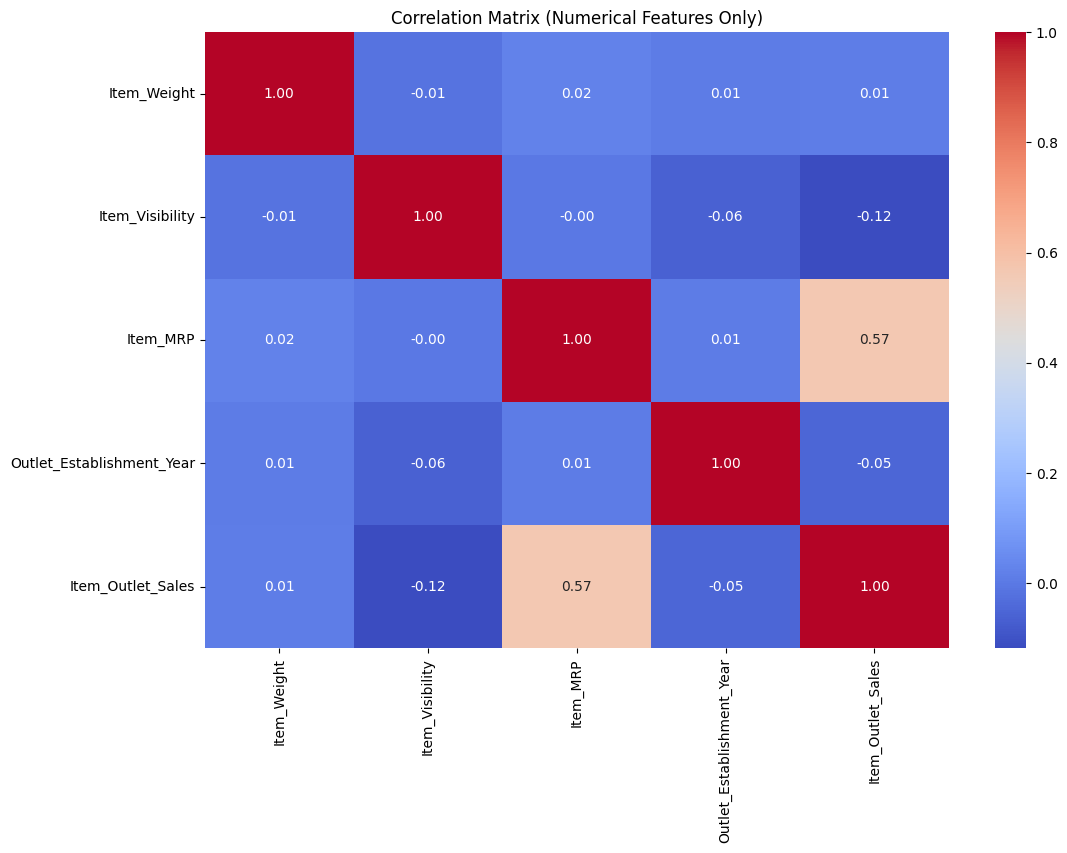

Correlation of each feature with the target:
Item_Weight                  0.009693
Item_Visibility             -0.117918
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64


In [ ]:
# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

# Get the correlation of each numerical feature with the target variable
correlation_with_target = correlation_matrix['Item_Outlet_Sales']  # Replace 'Sales' with your target column

# Print the correlation with the target variable
print("Correlation of each feature with the target:")
print(correlation_with_target)

# Select features that are highly correlated with the target (e.g., absolute value > 0.3)
highly_correlated_features = correlation_with_target[correlation_with_target.abs() > 0.3].index

# Create a new DataFrame with only these highly correlated features
df_filtered = data[highly_correlated_features]



outlier handling

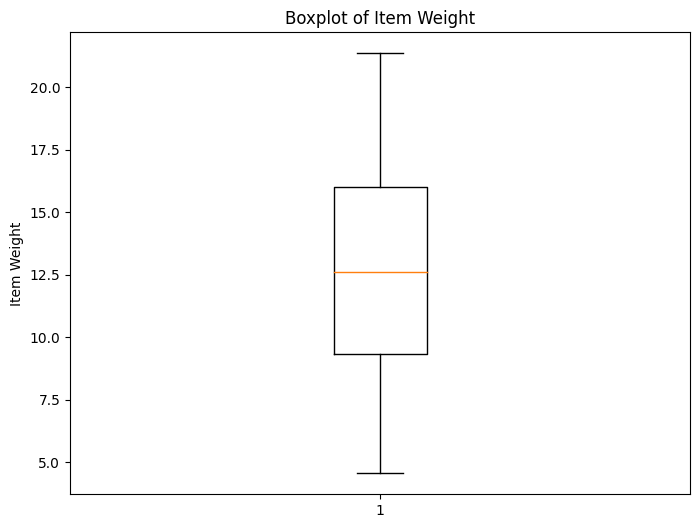

In [ ]:
# Create a boxplot for 'Item_Weight'
plt.figure(figsize=(8, 6))
plt.boxplot(data['Item_Weight'])
plt.title('Boxplot of Item Weight')
plt.ylabel('Item Weight')
plt.show()



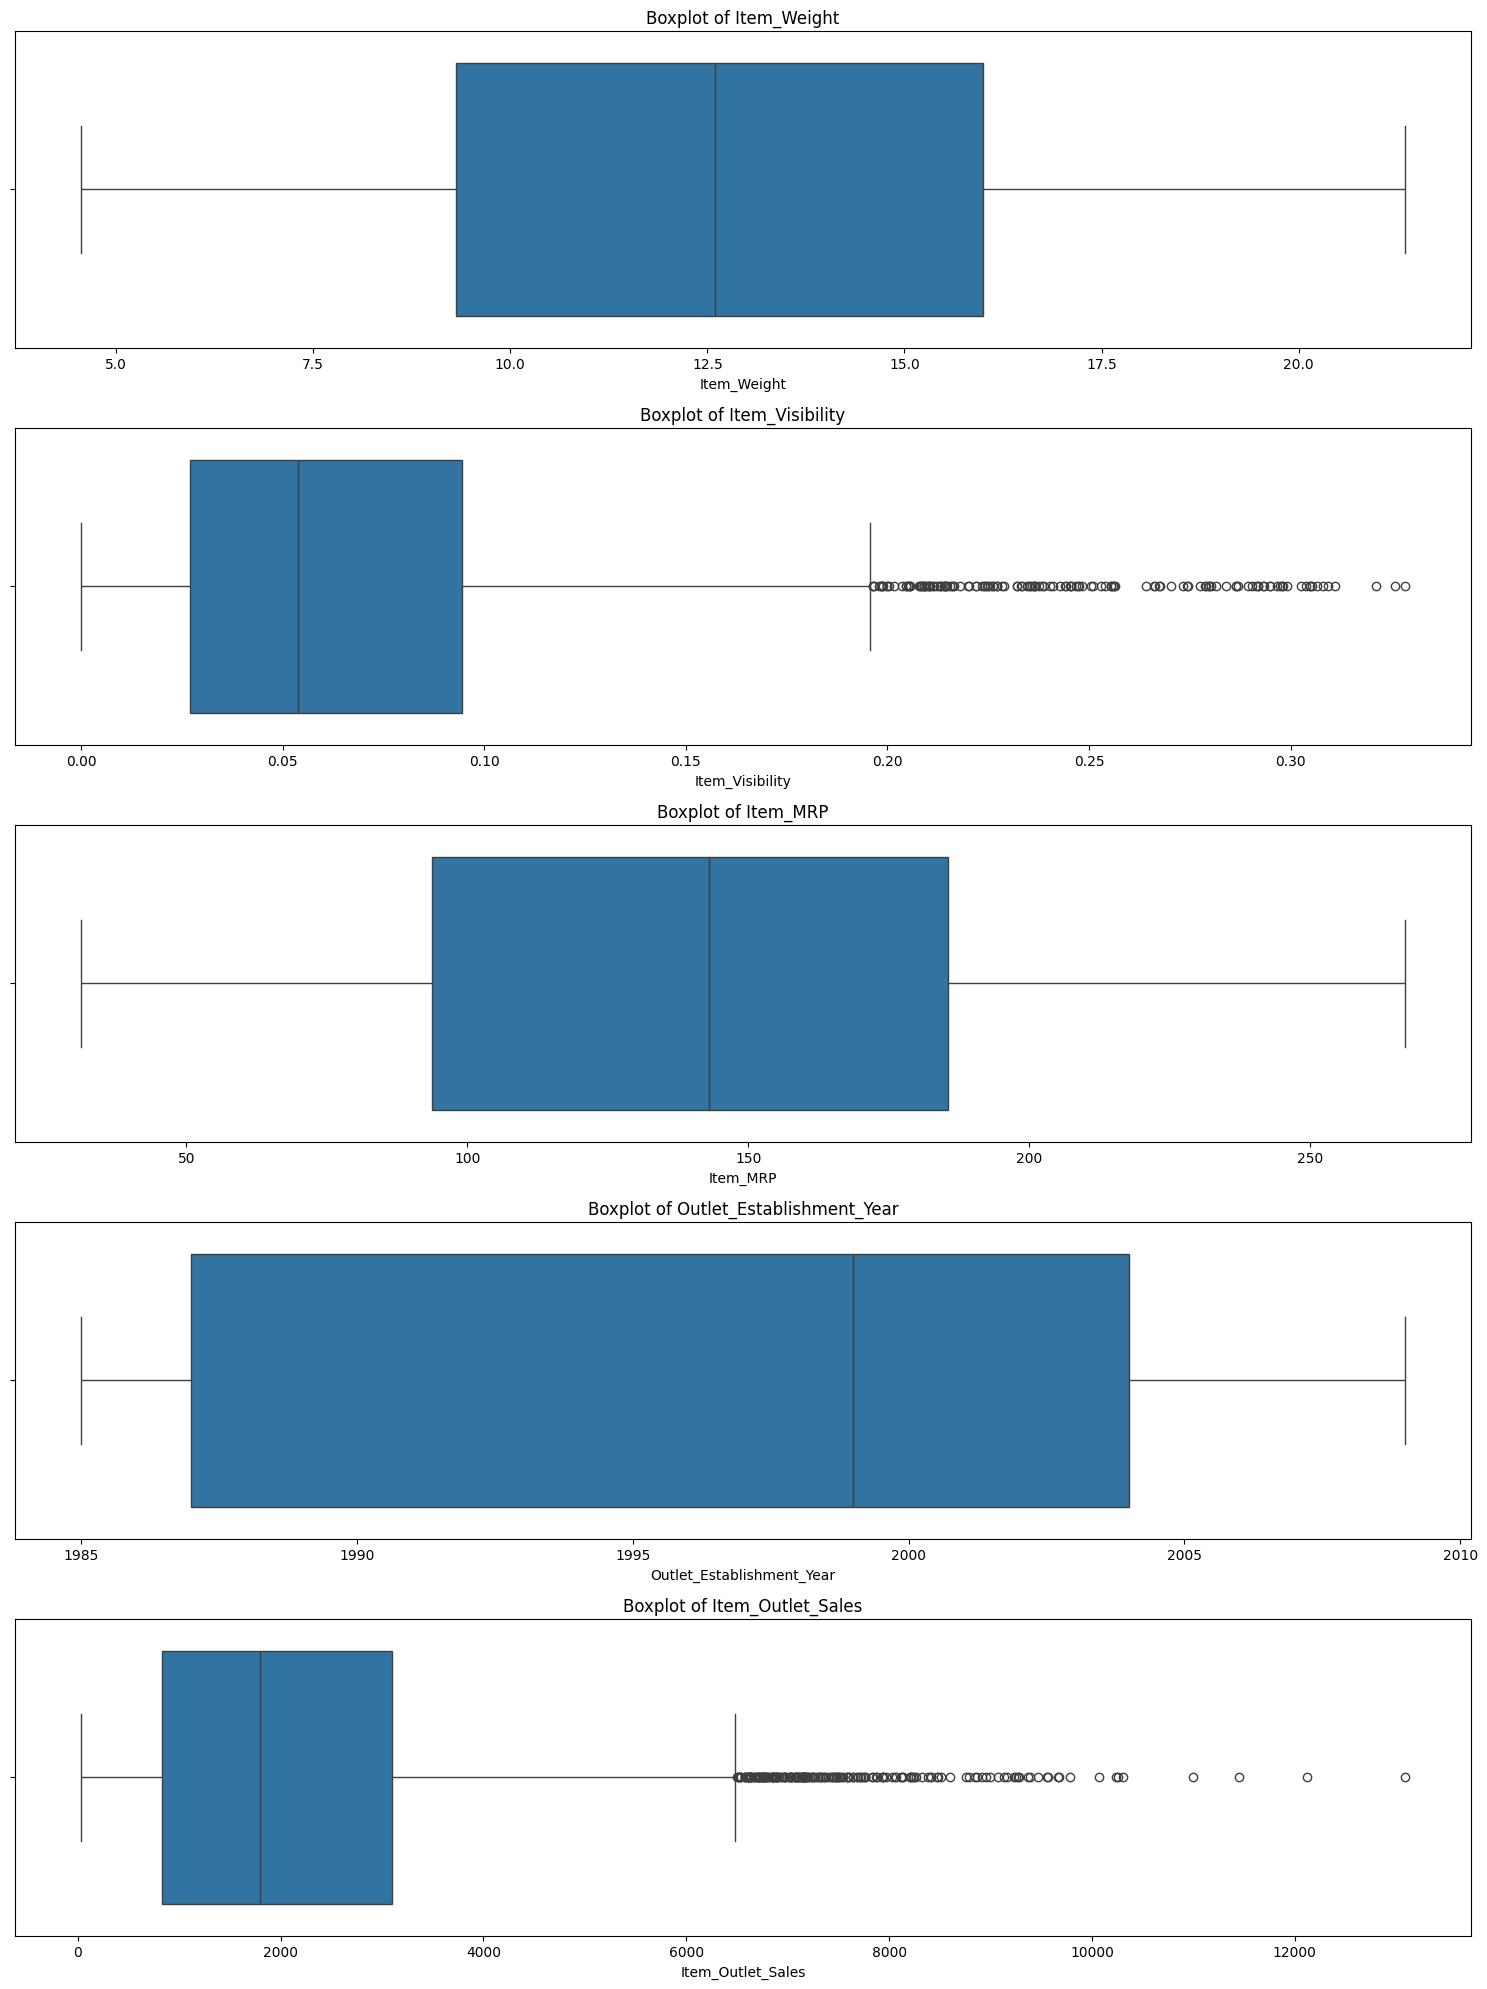

In [ ]:
# Get all numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure size
plt.figure(figsize=(15, len(numerical_columns) * 4))

# Loop through each numerical column and create a boxplot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)  # Create a subplot for each boxplot
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


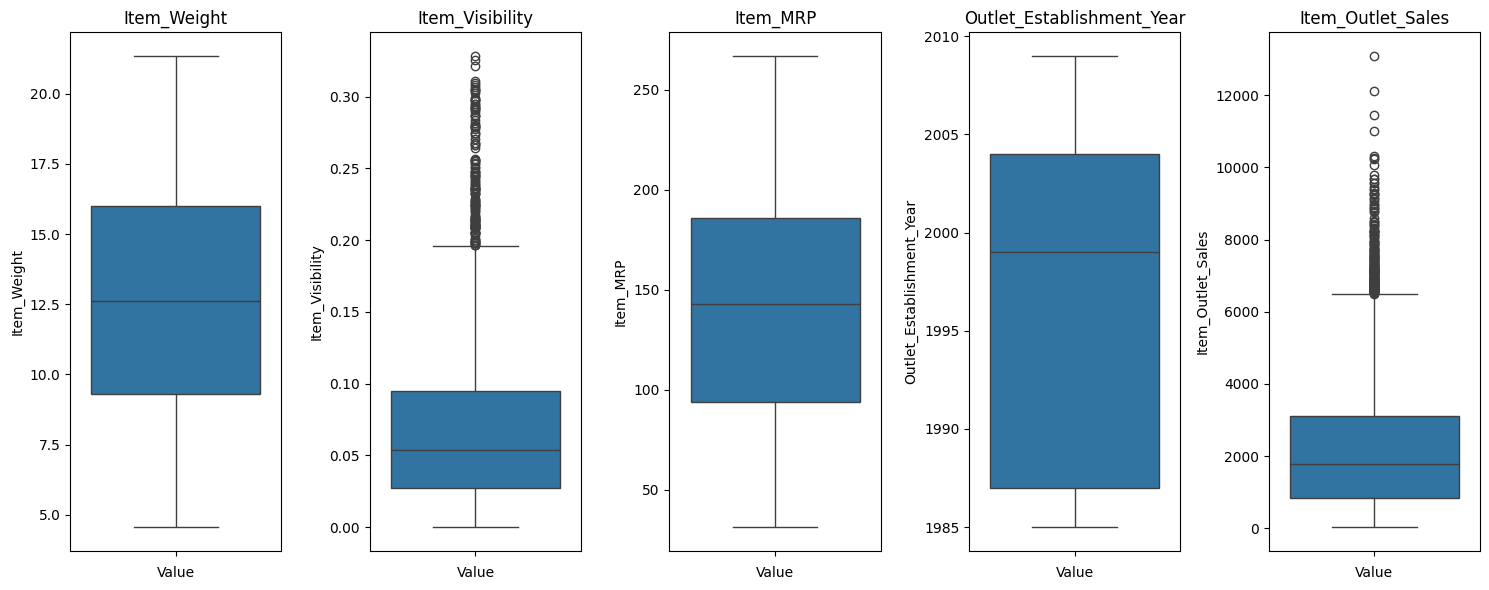

In [ ]:

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Set up the figure size and number of subplots in a single row
plt.figure(figsize=(15, 6))

# Loop through each numerical column and create a boxplot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)  # Create subplots in a single row
    sns.boxplot(y=data[column])  # Create a vertical boxplot
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel(column)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


خب ستون item visability زیاد داره

از طرفی خود ستون y

خب حالا بریم سراغ فهمیدن تعداد و اینکه چه کنیم

حذف کنیم یا با آپر یا لوور جایگزین کنیم

In [ ]:
# Dictionary to store the number of outliers for each column
outliers_count = {}

# Loop through each numerical column and calculate outliers using IQR
for column in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Count the number of outliers
    num_outliers = outliers.shape[0]

    # Store the count in the dictionary
    outliers_count[column] = num_outliers

# Display the number of outliers for each column
outliers_count


{'Item_Weight': 0,
 'Item_Visibility': 144,
 'Item_MRP': 0,
 'Outlet_Establishment_Year': 0,
 'Item_Outlet_Sales': 186}

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Item_Visibility'].quantile(0.25)
Q3 = data['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(data['Item_Visibility'] < lower_bound) | (data['Item_Visibility'] > upper_bound)]

# Display outliers
print("Outliers based on IQR:")
print(outliers)

# Optionally, remove outliers
#df = data[(data['Item_Weight'] >= lower_bound) & (data['Item_Weight'] <= upper_bound)]

# Cap outliers at the upper and lower bounds
data['Item_Visibility'] = np.where(data['Item_Visibility'] > upper_bound, upper_bound, data['Item_Visibility'])
data['Item_Visibility'] = np.where(data['Item_Visibility'] < lower_bound, lower_bound, data['Item_Visibility'])



Outliers based on IQR:
      Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
49          12.60          Regular         0.255395                  Dairy   
83          12.60          Low Fat         0.293418              Household   
108         12.60          low fat         0.278974            Soft Drinks   
174         17.70          Low Fat         0.291865  Fruits and Vegetables   
334         12.60          Low Fat         0.204700           Frozen Foods   
...           ...              ...              ...                    ...   
8292        12.60          Regular         0.209163  Fruits and Vegetables   
8345        12.60          Regular         0.266397           Frozen Foods   
8371         8.27          Regular         0.214125            Soft Drinks   
8432        14.00          Regular         0.227261           Frozen Foods   
8509         8.10          Low Fat         0.214306  Fruits and Vegetables   

      Item_MRP  Outlet_Establishment_Yea

In [ ]:
# Dictionary to store the number of outliers for each column
outliers_count = {}

# Loop through each numerical column and calculate outliers using IQR
for column in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Count the number of outliers
    num_outliers = outliers.shape[0]

    # Store the count in the dictionary
    outliers_count[column] = num_outliers

# Display the number of outliers for each column
outliers_count


{'Item_Weight': 0,
 'Item_Visibility': 0,
 'Item_MRP': 0,
 'Outlet_Establishment_Year': 0,
 'Item_Outlet_Sales': 186}

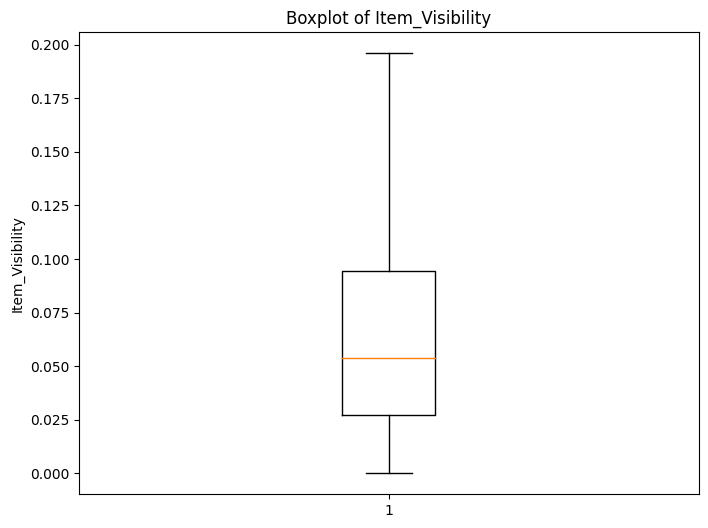

In [ ]:
# Create a boxplot for 'Item_Visibility'
plt.figure(figsize=(8, 6))
plt.boxplot(data['Item_Visibility'])
plt.title('Boxplot of Item_Visibility')
plt.ylabel('Item_Visibility')
plt.show()


# **hell yeah! i did it**

ستون لیبل هم داره فعلا دست نمی زنم

 **Normalizing**
 به گمونم اول باید ایکس و وای رو جدا کنیم
 چون قرار نیست ستون لیبل دیگه نرمال بشه

 ولی چون داده های لیبل اولا پرت هستن
 دوما چون مسئله رگرشن هست و قصد برگردوندن به اسکیل اولیه نداریم شاید مهم نباشه

In [ ]:
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

In [ ]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2


In [ ]:
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [ ]:
#چون شعورش نمیرسه کتگوریکال ها رو جدا کنه مجبور شدم اینطوری کنم
from sklearn.preprocessing import MinMaxScaler

# Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(exclude=['float64', 'int64']).columns

# Initialize MinMaxScaler
Minmax = MinMaxScaler()

# Scale only numerical columns
X[numerical_columns] = Minmax.fit_transform(X[numerical_columns])

# Combine numerical and categorical columns back into one DataFrame
X_scaled = pd.concat([X[numerical_columns], X[categorical_columns]], axis=1)

# 'df_scaled' now contains the scaled numerical columns and original categorical columns


In [ ]:
X_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.282525,0.081883,0.927507,0.583333,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,0.081274,0.098369,0.072068,1.000000,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,0.770765,0.085520,0.468288,0.583333,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,0.871986,0.000000,0.640093,0.541667,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,0.260494,0.000000,0.095805,0.083333,Low Fat,Household,High,Tier 3,Supermarket Type1


***کتگوریکال ها رو صفر و یک کردن***




In [ ]:
X_scaled= pd.get_dummies(X_scaled, drop_first=True)

In [ ]:
X_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.081883,0.927507,0.583333,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,0.081274,0.098369,0.072068,1.000000,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False
2,0.770765,0.085520,0.468288,0.583333,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,0.871986,0.000000,0.640093,0.541667,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,0.260494,0.000000,0.095805,0.083333,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


# **Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [ ]:
Regressor=LinearRegression()
Regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred1 = Regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.5488383903237162

LASSO & RIGID

In [ ]:
from sklearn.linear_model import Lasso, Ridge
lasso=Lasso()
lasso.fit(X_train,y_train)


Lasso()

In [ ]:
y_pred2 = lasso.predict(X_test)
r2_score(y_test, y_pred2)

0.5497506570063455

In [ ]:
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [ ]:
y_pred3 = ridge.predict(X_test)
r2_score(y_test, y_pred3)

0.5489302723781722

خب تفاتی بینشون نبود...

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
model = ElasticNet()
# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True, False],               # Whether to calculate the intercept for this model
    'positive': [True, False],                    # If True, forces coefficients to be positive
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],       # Regularization strength for Ridge/Lasso/ElasticNet
    'l1_ratio': [0, 0.1, 0.25, 0.5, 0.75, 1],          # ElasticNet only: mixing parameter between Lasso (l1) and Ridge (l2)
}



# Perform grid search
'''
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
'''
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42 , scoring='r2')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_



y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("R² Score on the test set:", r2)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'positive': True, 'l1_ratio': 1, 'fit_intercept': True, 'alpha': 1.0}
R² Score on the test set: 0.5500916955855333


In [ ]:
از# 55 بالا تر نرفته فعلا

//////////////////

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
pipeline = make_pipeline(LinearRegression(), Ridge(), Lasso())

In [ ]:
hyp_pars = {'polynomialfeatures__degree': [3,4,5,6,7,8,9,10],
            'ridge__alpha': [1e-4, 1e-3, 1e-2, 0.1]}         # میگی چیا رو عوض کنه و چه مثادیری رو دو به دو عوض کنه
                                                              # می تونستی چیزای دیگه هم بدی عوض کنه ترکیبشون رو بگه کدوم بهتر میشه

gridsearch = GridSearchCV(pipeline, param_grid=hyp_pars, cv=10, scoring='neg_mean_squared_error')
gridsearch.fit(X_train, y_)